# Set up environment

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
import GPy
set_matplotlib_formats('pdf', quality=90)
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18})

def save_figure(fig, name):
    figure_dir = '../thesis/figures/'
    fig.savefig(figure_dir + name)

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
xx = np.linspace(0, 2, 15)
sigma = 0.1
traj1 =  [np.random.normal(x, scale=sigma) for x in xx]
traj2 =  [4 - np.random.normal(x*1.5, scale=sigma) for x in xx]
traj3 =  [4.4 - np.random.normal(x*1.5, scale=sigma) for x in xx]
traj4 =  [np.random.normal(x*1.1, scale=sigma) for x in xx]
trajs = [traj1, traj2, traj3, traj4]
_, ax = plt.subplots(1, 1)
for i, traj in enumerate(trajs):
    ax.scatter(xx, traj, label=r'$T_' + str(i) + '$')
ax.set_title('Example trajectory data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()


<Figure size 576x396 with 1 Axes>

{'covariance': [[<matplotlib.lines.Line2D at 0x26b422d52b0>]]}

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


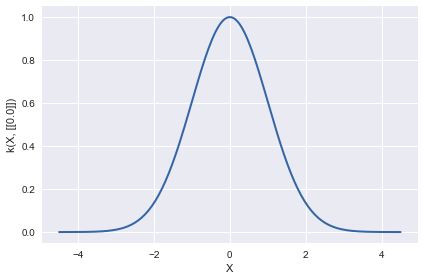

In [2]:

n = 5
X = np.random.uniform(-3.,3.,(n,1))
Y = np.sin(X) + np.random.randn(n,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)
kernel.plot()

# Sample prior for different kernels

In [121]:
from random import shuffle
x = list(range(10))
shuffle(x)
x

[0, 2, 5, 6, 4, 8, 7, 9, 1, 3]

In [27]:
import numpy as np
import GPy
from model.plotting import plot_grid

np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5), 'RBF'),
    (GPy.kern.Matern32(input_dim=1,lengthscale=0.5), 'Matern 32'),
    (GPy.kern.Linear(input_dim=1), 'Linear'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5), 'Periodic'),
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    2, len(kernels)
)

ix = lambda i, j: axs[j][i]

font_size = 25
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 3
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        k.plot(ax=ix(i, 0), linewidth=line_width)
        ix(i, 0).set_title(title, fontsize=font_size)
        ix(i, 0).set_xlabel('$x$', fontsize=font_size)
        ix(i, 0).set_ylabel('$y$', fontsize=font_size)
        ix(i, 0).tick_params(axis='x', labelsize=font_size-2)
        ix(i, 0).tick_params(axis='y', labelsize=font_size-2)
        
        ix(i, 1).plot(X[:],Z[n,:], linewidth=line_width)
        ix(i, 1).set_xlabel('x', fontsize=font_size)
        ix(i, 1).set_ylabel('y', fontsize=font_size)
        ix(i, 1).set_title(title, fontsize=font_size)
        ix(i, 1).tick_params(axis='x', labelsize=font_size-2)
        ix(i, 1).tick_params(axis='y', labelsize=font_size-2)

save_figure(fig, 'kernel-priors-vert.pdf')


<Figure size 2304x1152 with 8 Axes>

# Plot compound kernels 

In [28]:
np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5)*GPy.kern.Matern32(input_dim=1,lengthscale=0.5), r'RBF $\times$ Matern 32'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5) + GPy.kern.Linear(input_dim=1), 'Periodic + linear')
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    1, len(kernels)
)

ix = lambda i: axs[i]

title_font_size = 30
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 3
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        #k.plot(ax=ix(i), linewidth=line_width)
        ix(i).set_title(title, fontsize=title_font_size)
        ix(i).plot(X[:],Z[n,:], linewidth=line_width)
        ix(i).set_xlabel('x', fontsize=font_size)
        ix(i).set_ylabel('y', fontsize=font_size)
        ix(i).set_title(title, fontsize=title_font_size)
        ix(i).tick_params(axis='x', labelsize=font_size-2)
        ix(i).tick_params(axis='y', labelsize=font_size-2)
        
        
save_figure(fig, 'compound-kernels.pdf')


<Figure size 1152x576 with 2 Axes>

# Plot credible intervals

Text(17.200000000000003, 0.5, 'y')

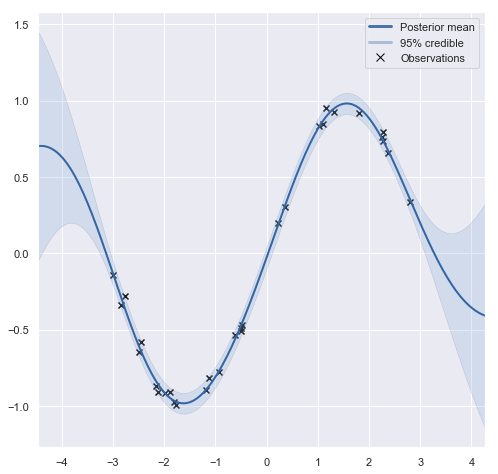

In [89]:
import GPy
import numpy as np
from IPython.display import display
from plotting import plot_grid
np.random.seed(1)

sns.set(style="darkgrid")

X = np.random.uniform(-3.,3.,(30,1))
Y = np.sin(X) + np.random.randn(30,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance=2., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
fig, ax = plot_grid(
    1, 1
)

m.likelihood.variance = 0.001
m.likelihood.variance.fix()
m.optimize()
m.plot(ax=ax, legend=False)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

#x = mpatches.Patch(color='black', label='Data')
#x2 = mpatches.Patch(color='blue', label='Mean')
#plt.legend(handles=[x,x2])

from matplotlib.lines import Line2D

lines = [
    Line2D([0], [0], color='#4974AC', linewidth=3, linestyle='-'),
    Line2D([0], [0], color='#ABBCD3', linewidth=3, linestyle='-'),
    Line2D([], [], color='black', linewidth=0, markersize=8, marker='x')
]
labels = ['Posterior mean', '95% credible', 'Observations']
ax.legend(lines, labels)

axs.set_xlabel('x')
axs.set_ylabel('y')

# Plot small likelihoods due to singleton motion patterns

In [2]:
from math import sqrt
seg_dict = dict(tuple(data.groupby('seg')))
def normalisation(seg):
    dx = seg.x.mean()
    dy = seg.y.mean()
    sd  = sqrt(max(seg.x.var(), seg.y.var()))
    def do_normalisation(data):
        data.x = (data.x - dx)/sd
        data.y = (data.y - dy)/sd
        return data
    
    return {
        'scale': do_normalisation,
        'sd': sd,
        'dx': dx,
        'dy': dy
    }
seg_norms = {
    seg_n: normalisation(seg_dict[seg_n])
    for seg_n in seg_dict
}

def normaliser_for_seg(seg_n):
    return seg_norms[seg_n] 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, clear_output
from plotting import plot_grid
from model import learn_function, plot_function, gamma_prior, FunctionModelPriors, TrajectoryModel, predict, compute_tau
from pandas import DataFrame
import GPy

sns.set(style="darkgrid")

np.random.seed(12345)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 20 # len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
traj_ixs = trajs.traj.unique()

route_n = 3
seg_n = 5
traj_n = 0
seg = trajs[(trajs.traj == traj_ixs[traj_n+1]) & (trajs.seg == seg_n)]
seg['tau'] = compute_tau(seg)
seg = normaliser_for_seg(seg_n)['scale'](seg)
domain = ['tau']
codomain = ['x', 'y']
likelihood = 0.06
kernel = GPy.kern.Matern32(
    input_dim=len(domain),
    ARD=True
)
    
f = learn_function(
    seg, domain, codomain,
    kernel, 'f', fixed_likelihood=likelihood
)

seg2 = trajs[(trajs.traj == traj_ixs[traj_n+4]) & (trajs.seg == seg_n)]
seg2['tau'] = compute_tau(seg2)
seg2 = normaliser_for_seg(seg_n)['scale'](seg2)
fig, ax = plot_grid(1, 1)
f.model.plot_f(ax=ax, plot_limits=[-0.05, 1.05], legend=0)
sns.scatterplot(data=seg2, x='tau', y='x', ax=ax, marker='+')
sns.scatterplot(data=seg2, x='tau', y='y', ax=ax, marker='+')
ax.set_ylabel('Position')
ax.set_xlabel(r'$\tau$')

from matplotlib.lines import Line2D

lines = [
    Line2D([0], [0], color='#4974AC', linewidth=3, linestyle='-'),
    Line2D([0], [0], color='#ABBCD3', linewidth=3, linestyle='-'),  ##E2EBF5
    Line2D([0], [0], color='#FF9E4A', linewidth=0, markersize=12, marker='+'),
    Line2D([0], [0], color='#5698C6', linewidth=0, markersize=12, marker='+')
]
labels = ['Posterior mean', '95% credible', r'Observation $p_x$', r'Observation $p_y$']
ax.legend(lines, labels)
#ax.legend()

ModuleNotFoundError: No module named 'plotting'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, clear_output
from model import learn_trajectory_model, plot_function, gamma_prior, FunctionModelPriors, TrajectoryModel, predict, compute_tau
from pandas import DataFrame

np.random.seed(12345)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 20 # len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
traj_ixs = trajs.traj.unique()

from math import sqrt
seg_dict = dict(tuple(data.groupby('seg')))
def normalisation(seg):
    dx = seg.x.mean()
    dy = seg.y.mean()
    sd  = sqrt(max(seg.x.var(), seg.y.var()))
    def do_normalisation(data):
        data.x = (data.x - dx)/sd
        data.y = (data.y - dy)/sd
        return data
    
    return {
        'scale': do_normalisation,
        'sd': sd,
        'dx': dx,
        'dy': dy
    }
seg_norms = {
    seg_n: normalisation(seg_dict[seg_n])
    for seg_n in seg_dict
}

def normaliser_for_seg(seg_n):
    return seg_norms[seg_n] 

from math import sqrt, cos, sin, radians
from plotting import plot_grid

%matplotlib inline
sns.set(style="darkgrid")

def compute_time_left(data: DataFrame) -> DataFrame:
    sorted_data = data.sort_values('timestamp')
    arrival_time = sorted_data.iloc[-1].timestamp
    sorted_data['time_left'] = [
        (arrival_time - t).seconds
        for t in sorted_data.timestamp
    ]
    return sorted_data
    
def drop_start_dwell(data):
    # https://stackoverflow.com/questions/52907328/pandas-delete-first-n-rows-until-condition-on-columns-is-fulfilled
    return data.loc[((data.dx > 0) & (data.dy > 0)).idxmax():]
    
def learn_model(data: DataFrame, route_n: int, seg_n: int, f_p_codomain, f_v_codomain) -> TrajectoryModel:
    f_p_priors = FunctionModelPriors(None, None, None)
    f_v_priors = FunctionModelPriors(None, None, None)
    g_kern_ls_prior = None #gamma_prior(0.5, .002)
    g_kern_var_prior = None # gamma_prior(1, .5)
    g_kern_lik_prior = None
    g_priors = FunctionModelPriors(
        g_kern_ls_prior, 
        g_kern_var_prior, 
        g_kern_lik_prior)
    h_priors = FunctionModelPriors(None, None, None)

    n_restarts = 1
    D = data.shape[0]
    fix_f_p_likelihood = 3 / D
    fix_f_v_likelihood = 3 / D
    n_augment_samples = 15
    augment_sigma = 4 / normaliser_for_seg(seg_n)['sd']# 5e-5
    augment_delta = 0.015 
    stop_compress_delta = 5e-3

    return learn_trajectory_model(
        normalise['scale'](drop_start_dwell(data)), 
        route_n,
        seg_n,
        f_p_codomain,
        f_v_codomain, 
        f_p_codomain,
        f_p_priors=f_p_priors,
        f_v_priors=f_v_priors,
        g_priors=g_priors,
        h_priors=h_priors,
        n_restarts=n_restarts,    
        stop_compress_delta=stop_compress_delta,
        fix_f_p_likelihood=fix_f_p_likelihood,
        fix_f_v_likelihood=fix_f_v_likelihood,
        n_augment_samples=n_augment_samples,
        augment_sigma=augment_sigma,
        augment_delta=augment_delta)

def plot_model(m: TrajectoryModel, data: DataFrame, f_p_codomain, f_v_codomain):
    n_rows = 4
    n_cols = 2
    fig_size = 8
    _, axs = plot_grid(n_rows, n_cols)

    # Input data
    sns.scatterplot(
        data=data, 
        x=f_p_codomain[0], 
        y=f_p_codomain[1], 
        ax=axs[0][0]
    )
    axs[0][0].set_title('Input data')

    # h for input data
    x = data[f_p_codomain].values
    mean, _  = predict(m.g, x)
    progress = compute_tau(x)
    df = pd.DataFrame({
        'prediction': mean.T[0], 
        'progress': progress
    })
    sns.scatterplot(
        data=df, 
        x='progress', 
        y='prediction', 
        ax=axs[1][0]
    )
    axs[1][0].set_title(r'Predicted $\tau$ of input data')
    #axs[1][0].set_aspect('equal', 'datalim')

    # Training data
    plot_function(m.g, ax=axs[0][1])
    axs[0][1].set_title(r'Inverse model function $g: (lat,lon) \mapsto \tau$')

    # H for training data
    mean, _  = m.g.model.predict(m.g.model.X)
    df = pd.DataFrame({
        'prediction': mean.T[0], 
        'progress': m.g.model.Y.flatten()
    })
    sns.scatterplot(
        data=df, 
        x='progress', 
        y='prediction', 
        ax=axs[1][1]
    )
    axs[1][1].set_title(r'Prediction $\tau$ of training data')

    # f_p
    m.f_p.model.plot(ax=axs[2][0])
    #plot_function(m.f_p, ax=axs[2][0])
    axs[2][0].set_title(r'Model function $f_p: \tau \mapsto (p_x, p_y)$')

    
    # f_v
    plot_function(m.f_v, ax=axs[2][1])
    axs[2][1].set_title(r'Model function $f_v: \tau \mapsto (v_x, v_y)$')

    # h
    plot_function(m.h, ax=axs[3][0])
    axs[3][0].set_title(r'Prediction function $h: \tau \mapsto t$')

route_n = 3
seg_n = 9
traj_n = 0
normalise = normaliser_for_seg(seg_n)
seg = trajs[(trajs.traj == traj_ixs[traj_n]) & (trajs.seg == seg_n)]
timed_seg = compute_time_left(seg)
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
m = learn_model(
    timed_seg, route_n, seg_n, 
    f_p_codomain, f_v_codomain
)
plot_model(m, timed_seg, f_p_codomain, f_v_codomain)
m.g.model

ImportError: cannot import name 'learn_trajectory_model'

## Load training data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from itertools import repeat
from IPython.display import display, clear_output
from pandas import DataFrame

from model.pre_process import pre_process
from model.segment_normaliser import normaliser_for_seg

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')
np.random.seed(1)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 200 #len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
train_traj_ids = trajs.traj.unique()
train_seg_ids  = trajs.seg.unique()

# Segment normaliser
seg_dict = dict(tuple(data.groupby('seg')))
seg_normalisers = {
    seg_n: normaliser_for_seg(seg_dict[seg_n])
    for seg_n in seg_dict
}

def load_train_seg(traj_n, seg_n):
    return trajs[(trajs.traj == traj_n) & (trajs.seg == seg_n)]

def in_sample_seg_loader(seg_n, traj_n, seg_size=1):
    print('loading segment', seg_n, traj_n, seg_size)
    return pre_process(
        load_train_seg(traj_n, seg_n), 
        stop_compress_delta, 
        seg_normalisers[seg_n],
        seg_size
    )

with open('ell-hyperparams.pkl', 'rb') as handle:
    ell_hyperparams = pickle.load(handle)

with open('var-hyperparams.pkl', 'rb') as handle:
    var_hyperparams = pickle.load(handle)

with open('lin-hyperparams.pkl', 'rb') as handle:
    lin_hyperparams = pickle.load(handle)

    
def from_km(km):
    return km*1000
    
def from_km_h(km_h):
    """To m/s"""
    return km_h/3.6

## Learn a model

In [32]:
from math import sqrt, cos, sin, radians
import seaborn as sns
import GPy
from GPy.models import GPRegression
from typing import List
from model.trajectory_model import learn_model, plot_model

%matplotlib inline
sns.set(style="darkgrid")

np.random.seed(1)

# What to load
route_n = 3
seg_n = 5 # 1-indexed
train_traj_n = 15 # 0-indexed
stop_compress_delta  = 4 # meters
train_traj_id = train_traj_ids[train_traj_n]
seg = in_sample_seg_loader(seg_n, train_traj_id)
normaliser = seg_normalisers[seg_n]
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
f_p_sigma_n =  .1 / normaliser.p_scale # meters
f_v_sigma_n = from_km_h(.00001) / normaliser.v_scale # m/s
g_sigma_n = 0 # tau is deterministic
h_sigma_n = 1 # seconds
delta_xy = 5 / normaliser.p_scale    # metres, spatial cluster width
delta_p = 4 / normaliser.p_scale # metres, p cluster width
delta_v = from_km_h(.5) / normaliser.v_scale   # metres/second, v cluster width

m = learn_model(
    seg, route_n, seg_n, train_traj_n,
    f_p_sigma_n, f_v_sigma_n, 
    g_sigma_n, h_sigma_n,
    delta_xy, delta_p, delta_v,
    ell_hyperparams[seg_n-1], 
    var_hyperparams[seg_n-1],
    lin_hyperparams[seg_n-1],
    n_restarts=3
)


plot_model(
    m, seg, normaliser
)

loading segment 5 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -80.64901158410537
Optimization restart 2/3, f = -80.64901158409468
Optimization restart 3/3, f = -80.64901158409685
Optimization restart 1/3, f = -82.29150834889415
Optimization restart 2/3, f = -82.2915083567854
Optimization restart 3/3, f = -82.29150835679515
Optimization restart 1/3, f = -82.29451982263497
Optimization restart 2/3, f = -82.29451982978055
Optimization restart 3/3, f = -82.29451982968668
Optimization restart 1/3, f = -85.66787915167446
Optimization restart 2/3, f = -85.6678791694712
Optimization restart 3/3, f = -85.6678791694697
Optimization restart 1/3, f = -86.27965866753337
Optimization restart 2/3, f = -86.27965864976011
Optimization restart 3/3, f = -86.27965866840663
Optimization restart 1/3, f = -86.31133681000554
Optimization restart 2/3, f = -86.31133681

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:divide by zero encountered in log
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/3, f = 1427690.6779384613
Optimization restart 2/3, f = 716356.8345179558


reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 1456352.5914583206
Optimization restart 1/3, f = 55.713523738094
Optimization restart 2/3, f = 55.71352373793644
Optimization restart 3/3, f = 55.713523737807904


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


<Figure size 1152x2880 with 10 Axes>

## Plot a segment

In [100]:

def plot_seg(axs, seg_n: int, gs):
    fs = 18
    seg = in_sample_seg_loader(seg_n, train_traj_id)
    axs.scatter(seg.x, seg.y, label='Observations', c=(seg.tau.values)*255)
    axs.set_xlabel(r'Normalised $x$', fontsize=fs)
    axs.set_ylabel(r'Normalised $y$', fontsize=fs)
    axs.set_title(r'Segment {} observations'.format(seg_n), fontsize=fs)
    axs.set_aspect('equal', 'box')
    sdx, sdy = seg.x.std(), seg.y.std()
    pad = 1.5
    xmin, xmax = seg.x.min() - sdx*pad, seg.x.max() + sdx*pad
    ymin, ymax = pad*seg.y.min() - sdy*pad, seg.y.max() + sdy*pad
    axs.tick_params(axis='x', labelsize=font_size-2)
    axs.tick_params(axis='y', labelsize=font_size-2)
    axs.set_xlim(-4, 4)
    axs.set_ylim(-2.2, 1.5)
    
_, ax = plot_grid(1, 1)
plot_seg(ax, 2)    

loading segment 2 299 1


<Figure size 576x576 with 1 Axes>

## Plot all segments

In [116]:
w, h = 3, 4
plt.rcParams.update({'font.size': 90})
fig, axs = plot_grid(h, w)
gs1 = gridspec.GridSpec(h, w)
gs1.update(wspace=0.025, hspace=0.05) 
for seg_n in range(1, 12):
    i = seg_n -1
    ax = axs[i // w][i % w]
    plot_seg(ax, seg_n)
    
axs[h-1][w-1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=-.7)
#fig.savefig('test.pdf', bbox_inches='tight', pad_inches=0.0)

#plt.subplot_tool()
#fig.tight_layout()

loading segment 1 299 1
loading segment 2 299 1
loading segment 3 299 1
loading segment 4 299 1
loading segment 5 299 1
loading segment 6 299 1
loading segment 7 299 1
loading segment 8 299 1
loading segment 9 299 1
loading segment 10 299 1
loading segment 11 299 1


<Figure size 1728x2304 with 12 Axes>

In [11]:
from functools import reduce
def l(models, seg_n):
    return models + [learn_model(
        in_sample_seg_loader(seg_n, train_traj_id), 
        route_n, seg_n, train_traj_n,
        f_p_sigma_n, f_v_sigma_n, 
        g_sigma_n, h_sigma_n,
        delta_xy, delta_p, delta_v,
        ell_hyperparams[seg_n-1], 
        var_hyperparams[seg_n-1],
        lin_hyperparams[seg_n-1],
        n_restarts=3
    )]

models = reduce(l, range(1, 12), [])

loading segment 1 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -110.69098752184772
Optimization restart 2/3, f = -110.69098752189235
Optimization restart 3/3, f = -110.69098752190735
Optimization restart 1/3, f = -112.00781438598815
Optimization restart 2/3, f = -112.00781438297595
Optimization restart 3/3, f = -112.0078143859594
Optimization restart 1/3, f = -111.99897319133196
Optimization restart 2/3, f = -111.99897319135866
Optimization restart 3/3, f = -111.99897315987775
Optimization restart 1/3, f = -125.57894610210764
Optimization restart 2/3, f = -125.57894610126354
Optimization restart 3/3, f = -125.57894610210101
Optimization restart 1/3, f = -128.0036852141402
Optimization restart 2/3, f = -128.0036852141412
Optimization restart 3/3, f = -128.0036852141433
Optimization restart 1/3, f = -128.10044365613857
Optimization restart 2/3, f

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/3, f = 7286401.937717438
Optimization restart 2/3, f = 7264022.325318813


reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 6603501.388929844
Optimization restart 1/3, f = 74.28905767354466
Optimization restart 2/3, f = 74.28905767482259
Optimization restart 3/3, f = 74.28905767353984
loading segment 2 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -71.67593778410097
Optimization restart 2/3, f = -71.675937784077
Optimization restart 3/3, f = -71.67593778409048
Optimization restart 1/3, f = -72.38430338319193
Optimization restart 2/3, f = -72.38430338320192
Optimization restart 3/3, f = -72.38430338322216
Optimization restart 1/3, f = -72.37861715022316
Optimization restart 2/3, f = -72.37861715026281
Optimization restart 3/3, f = -72.37861715025764
Optimization restart 1/3, f = -81.7972296954661
Optimization restart 2/3, f = -81.79722969546832
Optimization restart 3/3, f = -81.79722969544149
Optimization restart 1/3, f = -82.197921468217

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 471329.44078326225
Optimization restart 1/3, f = 95.42803273495305
Optimization restart 2/3, f = 95.42803273536965
Optimization restart 3/3, f = 95.42803273494829
loading segment 3 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -86.46945907257775
Optimization restart 2/3, f = -86.46945907258035
Optimization restart 3/3, f = -86.469459072556
Optimization restart 1/3, f = -87.16103376706408
Optimization restart 2/3, f = -87.1610337306333
Optimization restart 3/3, f = -87.16103376508667
Optimization restart 1/3, f = -87.16291301660549
Optimization restart 2/3, f = -87.16291301660532
Optimization restart 3/3, f = -87.16291287010769
Optimization restart 1/3, f = -90.75119179942764
Optimization restart 2/3, f = -90.75119179940114
Optimization restart 3/3, f = -90.75119179923956
Optimization restart 1/3, f = -91.14850138915

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/3, f = 303563.86558127403
Optimization restart 2/3, f = 73963.20309758186


reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 134750.4570953846
Optimization restart 1/3, f = 111.30369304985021
Optimization restart 2/3, f = 111.30369316466172
Optimization restart 3/3, f = 111.30369304984978
loading segment 4 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -41.05654314732369
Optimization restart 2/3, f = -41.05654314732367
Optimization restart 3/3, f = -41.056543147323666
Optimization restart 1/3, f = -41.761387808692646
Optimization restart 2/3, f = -41.761387809069205
Optimization restart 3/3, f = -41.761387809069326
Optimization restart 1/3, f = -42.05726397414758
Optimization restart 2/3, f = -42.05726397412485
Optimization restart 3/3, f = -42.05726397415068
Optimization restart 1/3, f = -36.157386347424776
Optimization restart 2/3, f = -36.15738634611959
Optimization restart 3/3, f = -36.157386337510744
Optimization restart 1/3, f = -36.

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 29782.21295797825
Optimization restart 1/3, f = 30.44417923807647
Optimization restart 2/3, f = 30.44417923810559
Optimization restart 3/3, f = 30.444179238146635
loading segment 5 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -80.64901158410139
Optimization restart 2/3, f = -80.64901158318999
Optimization restart 3/3, f = -80.64901158403515
Optimization restart 1/3, f = -82.29150834889803
Optimization restart 2/3, f = -82.29150835676202
Optimization restart 3/3, f = -82.29150835460463
Optimization restart 1/3, f = -82.29451982262214
Optimization restart 2/3, f = -82.29451982982829
Optimization restart 3/3, f = -82.29451982983733
Optimization restart 1/3, f = -85.66787915167586
Optimization restart 2/3, f = -85.66787916780352
Optimization restart 3/3, f = -85.66787916946042
Optimization restart 1/3, f = -86.27965887

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 728406.6121685505
Optimization restart 1/3, f = 55.713523738093855
Optimization restart 2/3, f = 55.713523856658796
Optimization restart 3/3, f = 55.71352373780819
loading segment 6 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -79.6650363892067
Optimization restart 2/3, f = -79.66503638926042
Optimization restart 3/3, f = -79.66503638920997
Optimization restart 1/3, f = -80.04585011107179
Optimization restart 2/3, f = -80.04585010945723
Optimization restart 3/3, f = -80.04585011108408
Optimization restart 1/3, f = -80.04066015199535
Optimization restart 2/3, f = -80.04066015190372
Optimization restart 3/3, f = -80.04066015202346
Optimization restart 1/3, f = -85.16408836803005
Optimization restart 2/3, f = -85.16408836803757
Optimization restart 3/3, f = -85.16408836803731
Optimization restart 1/3, f = -85.63134090

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 156284.2494380474
Optimization restart 1/3, f = 52.3447203960438
Optimization restart 2/3, f = 52.34472039598708
Optimization restart 3/3, f = 52.344720396022
loading segment 7 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -111.09244684899295
Optimization restart 2/3, f = -111.09244684913754
Optimization restart 3/3, f = -111.0924468492901
Optimization restart 1/3, f = -112.16681635668937
Optimization restart 2/3, f = -112.16681635561827
Optimization restart 3/3, f = -112.16681635630921
Optimization restart 1/3, f = -112.1728185714555
Optimization restart 2/3, f = -112.172818571773
Optimization restart 3/3, f = -112.17281857162773
Optimization restart 1/3, f = -120.51394332583162
Optimization restart 2/3, f = -120.51394332573533
Optimization restart 3/3, f = -120.51394332558723
Optimization restart 1/3, f = -121.129

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 336217.6795182228
Optimization restart 1/3, f = 131.14475570740905
Optimization restart 2/3, f = 131.14475570741487
Optimization restart 3/3, f = 131.1447557080441
loading segment 8 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -55.50602817373888
Optimization restart 2/3, f = -55.50602817378221
Optimization restart 3/3, f = -55.50602817277445
Optimization restart 1/3, f = -55.928329802248875
Optimization restart 2/3, f = -55.928329802272195
Optimization restart 3/3, f = -55.92832980228448
Optimization restart 1/3, f = -55.93200047990272
Optimization restart 2/3, f = -55.93200047987707
Optimization restart 3/3, f = -55.932000479869195
Optimization restart 1/3, f = -68.54139762477723
Optimization restart 2/3, f = -68.54139762463615
Optimization restart 3/3, f = -68.54139762458883
Optimization restart 1/3, f = -68.9741

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:339: RuntimeWarning:invalid value encountered in true_divide
reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 1253502.3572838306
Optimization restart 1/3, f = 61.423100696444266
Optimization restart 2/3, f = 61.423100696492426
Optimization restart 3/3, f = 61.42310069644449
loading segment 9 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -256.5907264301265
Optimization restart 2/3, f = -256.5907251685253
Optimization restart 3/3, f = -256.59072643012
Optimization restart 1/3, f = -257.8238403697011
Optimization restart 2/3, f = -257.8238403695024
Optimization restart 3/3, f = -257.82384036955267
Optimization restart 1/3, f = -257.8225688245941
Optimization restart 2/3, f = -257.82256870876745
Optimization restart 3/3, f = -257.82256882461166
Optimization restart 1/3, f = -277.436458408228
Optimization restart 2/3, f = -277.4364584082282
Optimization restart 3/3, f = -277.43645840822603
Optimization restart 1/3, f = -278.3968

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 909020.4494018555
Optimization restart 1/3, f = 253.1937404363068
Optimization restart 2/3, f = 253.19374043626323
Optimization restart 3/3, f = 253.1937404363481
loading segment 10 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -108.50210969737421
Optimization restart 2/3, f = -108.5021096979498
Optimization restart 3/3, f = -108.50210969793518
Optimization restart 1/3, f = -109.3409908548042
Optimization restart 2/3, f = -109.34099085468051
Optimization restart 3/3, f = -109.34099085475683
Optimization restart 1/3, f = -109.34535860666612
Optimization restart 2/3, f = -109.34535860665093
Optimization restart 3/3, f = -109.34535860628135
Optimization restart 1/3, f = -131.83692160480797
Optimization restart 2/3, f = -131.83692160481004
Optimization restart 3/3, f = -131.83692160480993
Optimization restart 1/3, f = -

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 315979.45241975784
Optimization restart 1/3, f = 129.61140630168578
Optimization restart 2/3, f = 129.61140630169453
Optimization restart 3/3, f = 129.6114063021243
loading segment 11 299 1
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -109.57528549762475
Optimization restart 2/3, f = -109.57528549761886
Optimization restart 3/3, f = -109.57528549760482
Optimization restart 1/3, f = -113.1911403994494
Optimization restart 2/3, f = -113.19114039789861
Optimization restart 3/3, f = -113.1911403993923
Optimization restart 1/3, f = -113.19250384697195
Optimization restart 2/3, f = -113.19250384697456
Optimization restart 3/3, f = -113.19250384686246
Optimization restart 1/3, f = -132.39879877248595
Optimization restart 2/3, f = -132.39879877244366
Optimization restart 3/3, f = -132.39879877252196
Optimization restart 1/3, f =

reconstraining parameters rbf.lengthscale


Optimization restart 3/3, f = 566797.798807621
Optimization restart 1/3, f = 118.40632257156597
Optimization restart 2/3, f = 118.40632257672094
Optimization restart 3/3, f = 118.4063225716005


In [34]:
from model.plotting import plot_grid
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', quality=90)
_, axs2 = plot_grid(1, 1)
#for i, m in enumerate(models):
#    ax = axs2 #[i // 3][i % 3]
#    m.g.model.plot(ax=ax)
models[8].g.model.plot(ax=axs2)
axs2.set_xlabel(r'Normalised $x$')
axs2.set_ylabel(r'Normalised $y$')
axs2.set_title(r'Synchronisation function $g$')
axs2.set_aspect('equal', 'box')
axs2.set_ylim(-.3, .3)
axs2.set_xlim(-1.5, 2.2)


NameError: name 'models' is not defined

<Figure size 576x576 with 1 Axes>

### Plot Pseudo clusters

In [124]:
from model.trajectory_model import plot_with_combination
from model.plotting import plot_grid, plot_data, default_color
from model.function_model import plot_posterior

_, ax0 = plot_grid(1, 1)
_, ax1 = plot_grid(1, 1)
tau_limit = 0.3
seg_to_plot = seg[seg.tau <= tau_limit]
tau_grid = np.linspace(0, tau_limit, 100)

mu, var = m.f_v_x.model.predict(tau_grid.reshape(-1, 1))
scale = lambda x: normaliser.unnormalise_dx(x)/3.6
plot_posterior(ax0, tau_grid, scale(mu), np.sqrt(var), r'$f_{v_x}$', default_color(0))
plot_data(ax0, seg_to_plot.tau, scale(seg_to_plot.dx))
ax0.set_title(r'Model $f_{v_x}$')
ax0.set_ylabel(r"$p(p_x | f_{v_x}, X_{obs})$")
ax0.set_xlabel(r'$\tau$')
ax0.legend()

plot_with_combination(ax1, tau_grid, m.f_v_x_1, m.f_v_x_2, "v_x", scale)
plot_data(ax1, seg_to_plot.tau, scale(seg_to_plot.dx))
ax1.set_title(r"Pseudo-cluster $f^{'}_{v_x}$")
ax1.set_ylabel(r"$p(p_x | f^{'}_{v_x}, X_{obs})$")
ax1.set_xlabel(r'$\tau$')
ax1.legend()

AttributeError: 'GPRegression' object has no attribute 'f_v_x'

<Figure size 576x576 with 1 Axes>

<Figure size 576x576 with 1 Axes>

In [117]:
from model.trajectory_model import model_t_mu_predictions, plot_most_probable_models, model_cum_probs, model_weights
from model.trajectory_model import model_cum_gp_likelihoods, plot_gp_likelihoods, make_grid, to_model_probabilities
from model.storage import acquire_db_conn

def load_models(route_n, seg_n, limit):
    import model.storage
    with acquire_db_conn() as conn:
        models = model.storage.load_models(
            int(route_n), 
            int(seg_n), 
            limit, conn
        )
    
    print('loaded {} models: {}'.format(len(models), [m.traj for m in models]))
    return models

route_n = 3
seg_n = 9
model_limit = 60
models_to_use = load_models(route_n, seg_n, model_limit)
model_ixs = range(len(models_to_use))
normaliser = seg_normalisers[seg_n]
print('using', len(models_to_use), 'models')
# Load in-sample segment
test_traj_n = 4
fraction_observed = .8
test_traj_id = train_traj_ids[test_traj_n]
seg = in_sample_seg_loader(
    seg_n, test_traj_id,
    fraction_observed
)

#seg = out_of_sample_seg_loader(
#    seg_n, test_traj_ids[0],
#    fraction_observed
#)

time_left = seg.iloc[-1].time_left
f_codomain = ['x', 'y', 'dx', 'dy']
X_obs = seg[f_codomain].values
t_mu_mus, t_mu_sigmas = model_t_mu_predictions(models_to_use, X_obs)
gp_likelihoods = model_cum_gp_likelihoods(models_to_use, X_obs)
probs = to_model_probabilities(gp_likelihoods)
print('most likely', probs.argmax(axis=0))
weights = probs[:, -1]

#print(model_weights(models_to_use, X_obs))

linestyle = lambda i: '-' if i == test_traj_n else ':'
plot_most_probable_models(
        models_to_use,
        weights,
        gp_likelihoods,
        normaliser,
        seg, 
        linestyle=linestyle,
        n_models=10
)

def to_probabilities(likelihoods):
    likelihoods = np.apply_along_axis(np.cumsum, 2, likelihoods)
    
    def to_prob(x):
        x = np.exp(x - x.max())
        return x / x.sum()
        
    likelihoods = np.apply_along_axis(to_prob, 1, likelihoods)
    return likelihoods

tau_grid = seg.tau.values
gp_probabilities = to_probabilities(gp_likelihoods)
plot_gp_likelihoods(tau_grid, gp_probabilities, linestyle)

loaded 10 models: [1, 41, 47, 107, 249, 308, 322, 359, 364, 400]
using 10 models
loading segment 9 68 0.8
most likely [9 9 9 9 7 4 4 2 2 7 7 7 7 2 2 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 7 7 7 7 7 7 7
 7 7 7 7 2 2 2 2 2 2 2 2 2 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


<Figure size 1152x1152 with 4 Axes>

<Figure size 1152x576 with 2 Axes>

<Figure size 1152x1152 with 4 Axes>

In [118]:
from model.trajectory_model import plot_model_probabilities
plot_model_probabilities(tau_grid, model_ixs, probs, linestyle)

10 (89, 10)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)
(89,) (89,)


<Figure size 576x576 with 1 Axes>

In [29]:
from model.trajectory_model import duplicate
from model.plotting import default_color, plot_data
from IPython.display import set_matplotlib_formats
plt.rcParams.update({'font.size': 18})
duplicate_color = default_color(0)
_, axs = plot_grid(1, 1)
xy_ax= axs
#x_ax = axs[0]
#y_ax = axs[1]
#xy_ax = axs[2]

set_matplotlib_formats('pdf', quality=90)

seg = in_sample_seg_loader(6, train_traj_id)

points_spatial_1, points_spatial_2 = duplicate(
    seg.x.values, seg.y.values, delta_xy
)

support_data = pd.DataFrame(np.vstack((
    np.hstack((points_spatial_1, seg.tau.values.reshape(-1, 1))),
    np.hstack((points_spatial_2, seg.tau.values.reshape(-1, 1)))
)), columns=['x', 'y', 'tau'])

augmented_data = seg[['x', 'y', 'tau']].append(support_data)
g_pos = augmented_data[['x', 'y']].values.reshape(-1, 2)
g_tau = augmented_data['tau'].values.reshape(-1, 1)

#x_ax.plot(seg.tau, seg.x)
#x_ax.plot(seg.tau, seg.x + .2, color=duplicate_color)
#x_ax.plot(seg.tau, seg.x - .2, color=duplicate_color)
#x_ax.set_xlabel(r'$\tau$')
#x_ax.set_ylabel(r'$x$')
#y_ax.plot(seg.tau, seg.y)
#y_ax.plot(seg.tau, seg.y + .1, color=duplicate_color)
#y_ax.plot(seg.tau, seg.y - .1, color=duplicate_color)
#y_ax.set_xlabel(r'$\tau$')
#y_ax.set_ylabel(r'$y$')
#import seaborn as sns
#sns.scatterplot(data=seg.iloc[:-10], x='x', y='y', hue='tau')
xy_ax.set_title('Segment after data augmentation')
xy_ax.scatter(seg.x, seg.y, label='Observations', c=(seg.tau.values)*255)
#plot_data(xy_ax, seg.x, seg.y)
xy_ax.set_xlabel('Normalised $x$')
xy_ax.set_ylabel('Normalised $y$')
axs.set_aspect('equal', 'box')
xy_ax.scatter(points_spatial_1[:,0], points_spatial_1[:,1], c=(seg.tau.values)*255)
xy_ax.scatter(points_spatial_2[:,0], points_spatial_2[:,1], c=(seg.tau.values)*255)
xy_ax.legend()

NameError: name 'in_sample_seg_loader' is not defined

<Figure size 576x576 with 1 Axes>

[3.24932384e+01 2.64497933e-02 9.67000000e+02 9.68000000e+02]
[5.17690198e+02 1.10431229e-03 9.71000000e+02 9.72000000e+02]
[1.41442995e+00 1.58083977e-01 9.75000000e+02 9.76000000e+02]
[9.23959352e-01 3.71341803e-01 9.79000000e+02 9.80000000e+02]


ValueError: x and y must have same first dimension, but have shapes (200,) and (4,)

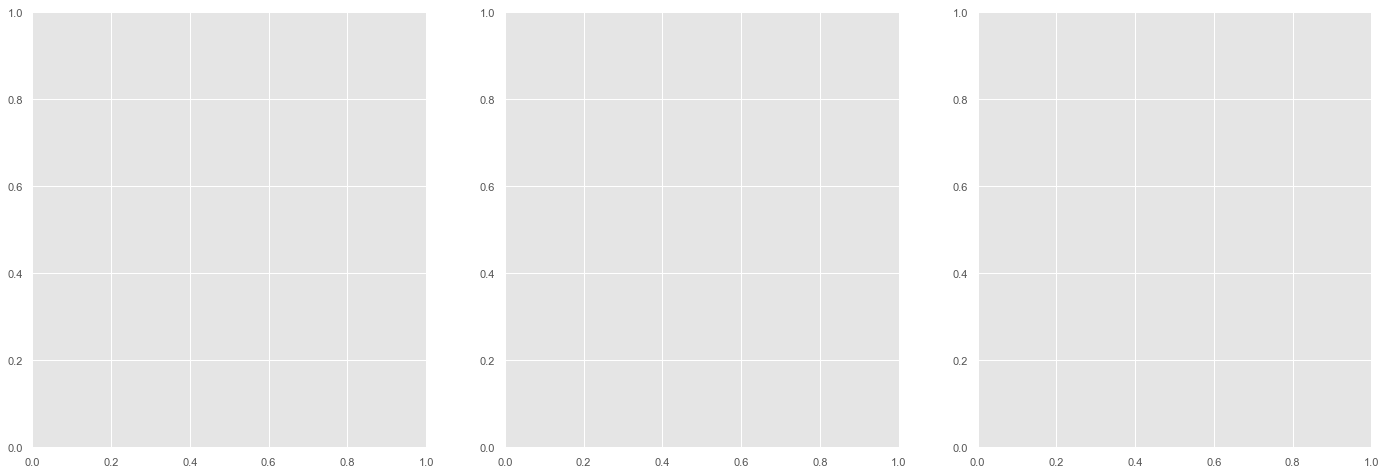

In [13]:
from model.plotting import plot_grid
from scipy.stats import gamma
import pickle
import numpy as np
with open('ell-hyperparams.pkl', 'rb') as handle:
    ell_hyperparams = pickle.load(handle)

with open('var-hyperparams.pkl', 'rb') as handle:
    var_hyperparams = pickle.load(handle)

with open('lin-hyperparams.pkl', 'rb') as handle:
    lin_hyperparams = pickle.load(handle)
    
_, ax = plot_grid(1, 3)
ell_ax = ax[0]

ell_grid = np.linspace(0, 10, 200)
for seg_n in train_seg_ids:
    print(ell_hyperparams[seg_n][0])
    print(ell_hyperparams[seg_n][1])
    print(ell_hyperparams[seg_n][2])
    print(ell_hyperparams[seg_n][3])
    alpha = ell_hyperparams[seg_n][1]
    #ell = 
    ell_ax.plot(ell_grid, ell)

## Plot inducing inputs regularisation

In [71]:
from model.function_model import learn_sparse, plot_function, predict
import GPy

n_restarts = 3
stop_compress_delta = 4
seg_n = 11
traj_n = 0
train_traj_id = train_traj_ids[traj_n]
seg = in_sample_seg_loader(seg_n, train_traj_id)
normaliser = seg_normalisers[seg_n]
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
f_p_sigma_n =  .1 / normaliser.p_scale # meters
f_v_sigma_n = from_km_h(.00001) / normaliser.v_scale # m/s
g_sigma_n = 0 # tau is deterministic
h_sigma_n = 1 # seconds
delta_xy = 5 / normaliser.p_scale # metres, spatial cluster width
delta_p = 4 / normaliser.p_scale # metres, p cluster width
delta_v = from_km_h(.5) / normaliser.v_scale # metres/second, v cluster width
n_inducing = int(seg.shape[0] * .3)
X = seg.tau.values.reshape(-1, 1)
y = seg.dy.values.reshape(-1, 1)
k = GPy.kern.Matern32(1)
sgp = learn_sparse(X, y, k, n_inducing, f_v_sigma_n, n_restarts)


loading segment 11 7 1
Optimization restart 1/3, f = -175.6053111689762
Optimization restart 2/3, f = -174.85141379960987
Optimization restart 3/3, f = -175.60531111839373


In [72]:
from model.function_model import plot_posterior
from model.plotting import default_color, plot_data
tau_grid = np.linspace(0, .2, 200)
mu, var = predict(sgp, tau_grid.reshape(-1, 1))
_, ax = plt.subplots(1, 1)
plot_function(sgp, ax=ax)
#plot_posterior(ax, tau_grid, mu, np.sqrt(var), label='SGP', color=default_color(0))
plot_data(ax, X, y)
ax.set_xlim(0, 1)

(0, 1)

<Figure size 576x396 with 1 Axes>